In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from thesis_toolbox.plot.tools import map_large_scale, add_letter, add_colorbar
from thesis_toolbox.composites.create_composites import detrend_timeseries,select_years_to_composite
from thesis_toolbox.composites.setup_thesis_data import mslp_wind_composite,geopot_wind_composite
from thesis_toolbox.plot.plot_composites import plot_mslp_850hpa_composite, plot_500hPa_composite
import cartopy.crs as ccrs
import numpy as np
import matplotlib
%matplotlib inline

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
else:
    path = '../../'
    to_file= False

In [3]:

mo_index = xr.open_dataset(path+'results/eawmi/era5.single_level.EAWM_MO.DJF.1979-2019.nc').sel(time=slice('1999','2019'))
mo_index = detrend_timeseries(mo_index.MO)
weak_wintermonsoon, strong_wintermonsoon = select_years_to_composite(mo_index, 4, criterion='rank')

ao = xr.open_dataset(path+'results/ao/era5.1000hPa.AO_EOF.DJF.1979-2019.nc').sel(time=slice('1999','2019'))
ao_index = detrend_timeseries(ao.AO_EOF)
weak_ao, strong_ao = select_years_to_composite(ao_index.sel(mode=0),4 ,criterion='rank')

data_path = path + 'downloads/intermediate_results/'
u_850_hpa=xr.open_dataset(data_path+'era5.850hPa.u_component_of_wind.DJF.1979-2019.nc')
v_850_hpa=xr.open_dataset(data_path+'era5.850hPa.v_component_of_wind.DJF.1979-2019.nc')
mslp = xr.open_dataset(data_path+'era5.single_level.mean_sea_level_pressure.DJF.1979-2019.nc')

mo_composite_DJF = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,weak_wintermonsoon,strong_wintermonsoon,'850',season='DJF')
ao_composite_DJF = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,strong_ao,weak_ao,'850',season='DJF')

u_850_hpa=xr.open_dataset(data_path+'/era5.850hPa.u_component_of_wind.MAM.1979-2019.nc')
v_850_hpa=xr.open_dataset(data_path+'era5.850hPa.v_component_of_wind.MAM.1979-2019.nc')
mslp = xr.open_dataset(data_path+'era5.single_level.mean_sea_level_pressure.MAM.1979-2019.nc')

mo_composite_MAM = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,weak_wintermonsoon,strong_wintermonsoon,'850',season='MAM')
ao_composite_MAM = mslp_wind_composite(mslp,u_850_hpa,v_850_hpa,strong_ao,weak_ao,'850',season='MAM')

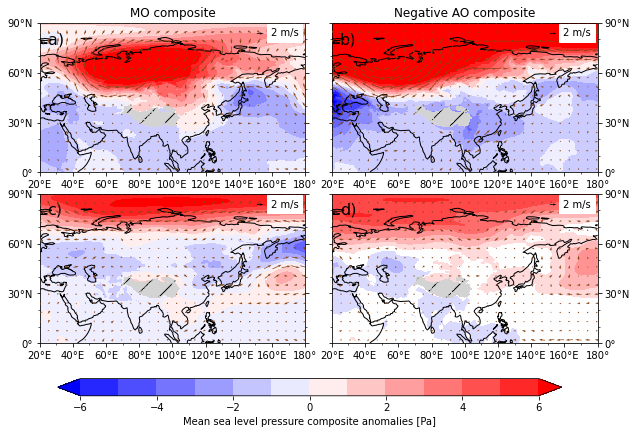

In [4]:
fig,ax = plt.subplots(ncols=2,nrows=2, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10,6))
plot_mslp_850hpa_composite(mo_composite_DJF,ax=ax[0,0], x_qk=0.842, y_qk=.935, vector_scale=0.5,angles='uv', colorbar=False)
plot_mslp_850hpa_composite(ao_composite_DJF,ax=ax[0,1],x_qk=0.842, y_qk=.935, vector_scale=0.5,angles='uv', colorbar=False)
ax[0,0].set_title('MO composite')
ax[0,1].set_title('Negative AO composite')
ax[0,1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
ax[0,0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
plot_mslp_850hpa_composite(mo_composite_MAM,ax=ax[1,0],x_qk=0.842, y_qk=.93, vector_scale=0.5,angles='uv', colorbar=False)
plot_mslp_850hpa_composite(ao_composite_MAM,ax=ax[1,1],x_qk=0.842, y_qk=.93, vector_scale=0.5,angles='uv', colorbar=False)
ax[1,1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
ax[1,0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
cax = fig.add_axes([0.15, 0.01,0.7,0.04])
cmap = matplotlib.cm.bwr
fig.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='horizontal', 
            label='Mean sea level pressure composite anomalies [Pa]')
add_letter(ax, y=0.86)
if to_file:
    plt.savefig(snakemake.output.path_850hpa, bbox_inches='tight')

In [5]:

u_500_hpa=xr.open_dataset(data_path+'era5.500hPa.u_component_of_wind.DJF.1979-2019.nc')
v_500_hpa=xr.open_dataset(data_path+'era5.500hPa.v_component_of_wind.DJF.1979-2019.nc')
geopot = xr.open_dataset(data_path+'era5.500hPa.GeopotHeight.DJF.1979-2019.nc')

mo_composite_DJF = geopot_wind_composite(geopot,u_500_hpa,v_500_hpa,weak_wintermonsoon,strong_wintermonsoon,'500',season='DJF')
ao_composite_DJF = geopot_wind_composite(geopot,u_500_hpa,v_500_hpa,strong_ao,weak_ao,'500',season='DJF')

u_500_hpa=xr.open_dataset(data_path+'/era5.500hPa.u_component_of_wind.MAM.1979-2019.nc')
v_500_hpa=xr.open_dataset(data_path+'era5.500hPa.v_component_of_wind.MAM.1979-2019.nc')
geopot = xr.open_dataset(data_path+'era5.500hPa.GeopotHeight.MAM.1979-2019.nc')

mo_composite_MAM = geopot_wind_composite(geopot,u_500_hpa,v_500_hpa,weak_wintermonsoon,strong_wintermonsoon,'500',season='MAM')
ao_composite_MAM = geopot_wind_composite(geopot,u_500_hpa,v_500_hpa,strong_ao,weak_ao,'500',season='MAM')

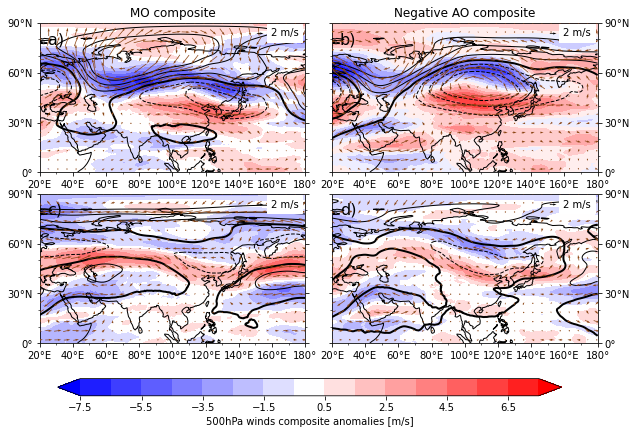

In [6]:
fig,ax = plt.subplots(ncols=2,nrows=2, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10,6))
plot_500hPa_composite(mo_composite_DJF,ax=ax[0,0], x_qk=0.842, y_qk=.935, vector_scale=0.5,angles='uv', colorbar=False)
plot_500hPa_composite(ao_composite_DJF,ax=ax[0,1],x_qk=0.842, y_qk=.935, vector_scale=0.5,angles='uv', colorbar=False)
ax[0,0].set_title('MO composite')
ax[0,1].set_title('Negative AO composite')
ax[0,1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
ax[0,0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
plot_500hPa_composite(mo_composite_MAM,ax=ax[1,0],x_qk=0.842, y_qk=.93, vector_scale=0.5,angles='uv', colorbar=False)
plot_500hPa_composite(ao_composite_MAM,ax=ax[1,1],x_qk=0.842, y_qk=.93, vector_scale=0.5,angles='uv', colorbar=False)
ax[1,1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
ax[1,0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
cax = fig.add_axes([0.15, 0.01,0.7,0.04])
cmap = matplotlib.cm.bwr
fig.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.BoundaryNorm(np.linspace(-7.5,7.5,16),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='horizontal', 
            label='500hPa winds composite anomalies [m/s]')
add_letter(ax, y=0.86)
if to_file:
    plt.savefig(snakemake.path_500hPa, bbox_inches='tight')